___
<img style="float: right; margin: 15px 15px 15px 15px;" src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2F4.bp.blogspot.com%2F-OQZGt_5WqDo%2FWa_Dfa4U15I%2FAAAAAAAAAUI%2FveRmAmUUKFA19dVw6XCOV2YLO6n-y_omwCLcBGAs%2Fs1600%2Fout.jpg&f=1&nofb=1&ipt=1dd6a02de0e3c13ae4585e7abf56f5191364c82f5f94af05007bc3e46a5d8866" width="200px" height="180px" />


# <font color= #bbc28d> **Fashion MNIST** </font>
#### <font color= #2E9AFE> `Project 1 - Machine Learning`</font>
- <Strong> Sofía Maldonado, Diana Valdivia, Samantha Sánchez, Isa Valladolid & Viviana Toledo </Strong>
- <Strong> Fecha </Strong>: 21/09/2025.

___

<p style="text-align:right;"> Image retrieved from: https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2F4.bp.blogspot.com%2F-OQZGt_5WqDo%2FWa_Dfa4U15I%2FAAAAAAAAAUI%2FveRmAmUUKFA19dVw6XCOV2YLO6n-y_omwCLcBGAs%2Fs1600%2Fout.jpg&f=1&nofb=1&ipt=1dd6a02de0e3c13ae4585e7abf56f5191364c82f5f94af05007bc3e46a5d8866</p>

# <font color= #bbc28d> **Data Preprocessing** </font>

In [94]:
# Librerías Generales
import numpy as np
from tensorflow.keras import datasets

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.pipeline import Pipeline

# Modelos
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Pytorch CNN

In [95]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

print(f"""Train Data: {X_train.shape} \n
Dev Data: {X_dev.shape} \n
Test Data: {X_test.shape}""")

Train Data: (48000, 28, 28) 

Dev Data: (12000, 28, 28) 

Test Data: (10000, 28, 28)


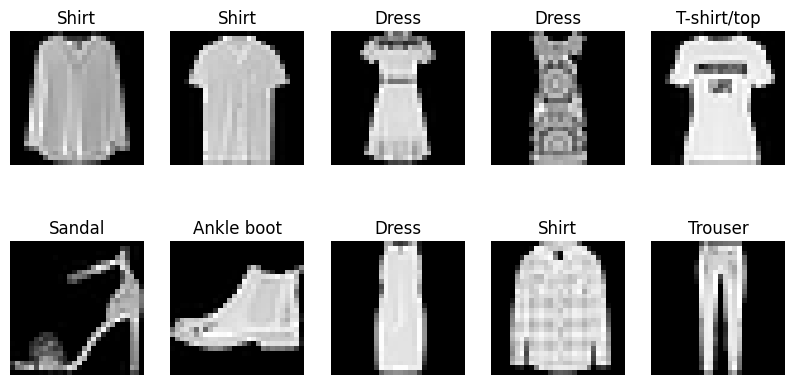

In [96]:
# Visualize the images
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.show()

### <font color= #84a7b3> • **Image Standarization** </font>

In [97]:
# Normalize 
X_train_norm = X_train.astype('float32') / 255
X_dev_norm = X_dev.astype('float32') / 255
X_test_norm = X_test.astype('float32') / 255

### <font color= #84a7b3> • **Noise Insertion** </font>

In [98]:
# Expand Dimensions (3D images) for ImageDataGenerator
X_train_norm = np.expand_dims(X_train_norm, -1)
X_dev_norm = np.expand_dims(X_dev_norm, -1)
X_test_norm = np.expand_dims(X_test_norm, -1)

datagen = ImageDataGenerator(
    rescale=1/1,   
    rotation_range=10,                  # Image Rotation
    width_shift_range=0.1,              # Width Shift
    height_shift_range=0.1,             # Height Shift
    shear_range=0.05,                   # Axis Bias
    zoom_range=0.1,                     # Zoom
    horizontal_flip=True,               # Horizontal Split
)

# Create generator from arrays
data_gen_train = datagen.flow(
    X_train_norm,
    y_train,
    batch_size=32,
    shuffle=False,
    seed=69
)

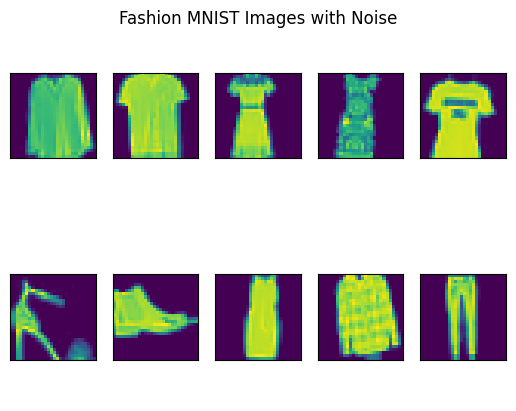

In [99]:
plt.title('Fashion MNIST Images with Noise')
plt.axis("off")
for imagen, etiqueta in data_gen_train:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

The variable _data-gen-train_ contains the images with noise added, in adequate dimensions for a Keras Convolutional Neural Network (CNN).   

### <font color= #84a7b3> • **Image Vectorization** </font>

Some of the models used in this notebook only accept vectorized input variables. Thus, we have to vectorize _data-gen-train_.

In [104]:
X_train_array, y_train_array = data_gen_train.next()  # Takes a Batch

# Iter over each Batch
X_train_full = []
y_train_full = []

for i in range(len(data_gen_train)):
    X_batch, y_batch = data_gen_train[i]
    X_train_full.append(X_batch)
    y_train_full.append(y_batch)

X_train_full = np.concatenate(X_train_full)
y_train_full = np.concatenate(y_train_full)

# Vectorize/Flatten images
X_train_flat = X_train_full.reshape(X_train_full.shape[0], -1)
X_dev_flat = X_dev.reshape(X_dev.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

Finally, our variables are flattened for use in the models.

> ### OIGANNNNN!!! Las variables X_train_flat, X_dev_flat y X_test_flat son las que deberían de utilizar para sus modelos <3
> ### Para las y's, utilicen y_train, y_dev e y_test 

# <font color= #bbc28d> **Logistic Regression** </font>

# <font color= #bbc28d> **SVM** </font>

# <font color= #bbc28d> **Random Forest Classifier** </font>

# <font color= #bbc28d> **Multilayered Perceptron** </font>

# <font color= #bbc28d> **Convolutional Neural Network** </font>